In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

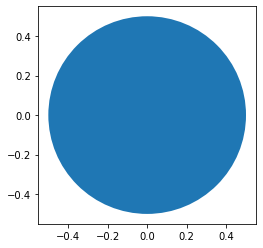

In [2]:
# 绘制圆形
ax = plt.axes()
ax.set_aspect('equal')  # x轴与y轴等比例
circle = plt.Circle((0, 0), radius = 0.5)
ax.add_patch(circle)    # 将圆形添加到坐标轴对象中
plt.axis('scaled')      # 自动调节数轴的取值范围

plt.show()

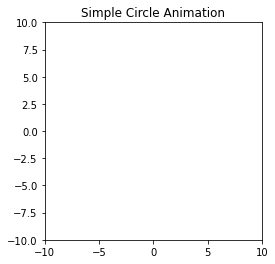

In [3]:
# 绘制动画图形
# jupyter中不显示动画，需要在terminal中执行
from matplotlib import animation

def update_radius(i, circle):
    circle.radius = i*0.5
    return circle

fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal')
circle = plt.Circle((0, 0), radius = 0.05)
ax.add_patch(circle)

anim = animation.FuncAnimation(fig, update_radius, fargs=(circle,), frames=30, interval=50)

plt.title('Simple Circle Animation')
plt.show()

Enter the initial velocity (m/s): 100
Enter the angle of projection (degrees): 45


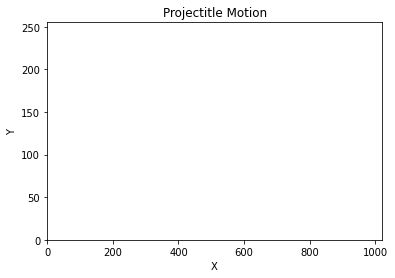

In [4]:
# 绘制抛物线轨迹动画
# jupyter中不显示动画，需要在terminal中执行

from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start += interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t**2
    circle.center = x, y
    return circle

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig,
                                   update_position,
                                   fargs=(circle, intervals, u, theta),
                                   frames=len(intervals),
                                   interval=1,
                                   repeat=False)
    
    plt.title('Projectitle Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)